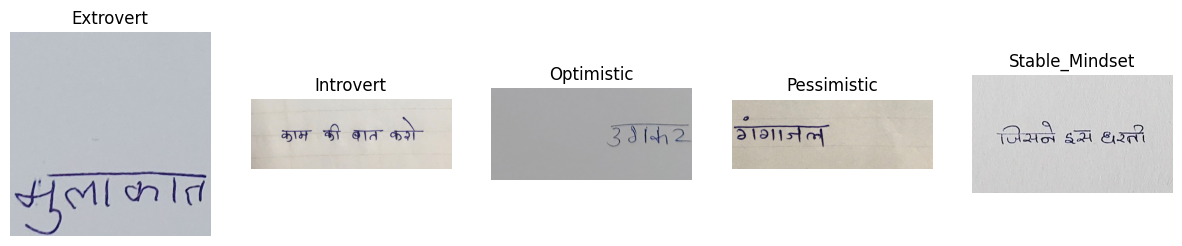

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the dataset directory
dataset_dir = '/kaggle/input/devanagari-word-dataset-for-personality-prediction/Dataset'

# Define the categories based on directory names
categories = ['Extrovert', 'Introvert', 'Optimistic', 'Pessimistic', 'Stable_Mindset']

# Function to load and display a few images from each category
def visualize_samples(dataset_dir, categories):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_dir = os.path.join(dataset_dir, category)
        sample_image = os.listdir(category_dir)[0]  # Load the first image from the category
        img = load_img(os.path.join(category_dir, sample_image))
        plt.subplot(1, len(categories), i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Visualize sample images
visualize_samples(dataset_dir, categories)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
img_height = 128
img_width = 128
batch_size = 32

# Create an ImageDataGenerator instance for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0,1]
    validation_split=0.2 # 20% of data for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the class indices
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)


Found 2583 images belonging to 5 classes.
Found 644 images belonging to 5 classes.
Class Indices: {'Extrovert': 0, 'Introvert': 1, 'Optimistic': 2, 'Pessimistic': 3, 'Stable_Mindset': 4}


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
img_height = 128
img_width = 128
batch_size = 32

# Create an ImageDataGenerator instance with data augmentation for training
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0,1]
    rotation_range=20, # Random rotation between 0-20 degrees
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2, # Random shear transformation
    zoom_range=0.2, # Random zoom
    horizontal_flip=True, # Random horizontal flip
    fill_mode='nearest', # Fill in pixels after transformation
    validation_split=0.2 # 20% of data for validation
)

# Load training data with augmentation
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data (no augmentation, only normalization)
validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2583 images belonging to 5 classes.
Found 644 images belonging to 5 classes.


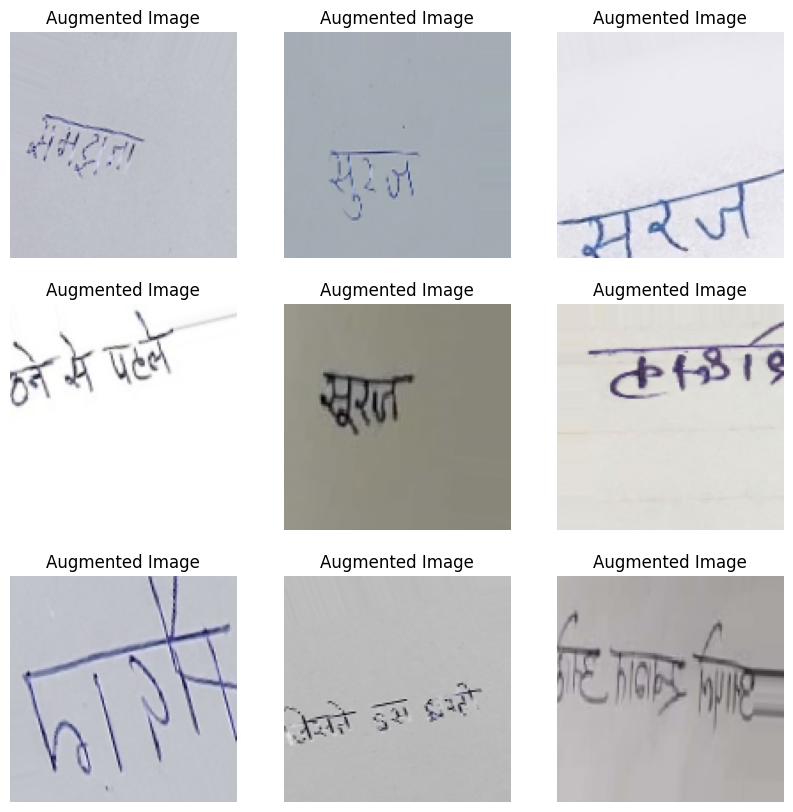

In [4]:
# Get a batch of images and labels from the augmented training data
images, labels = next(train_generator_augmented)

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Augmented Image")
    plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(5, activation='softmax')  # 5 output classes corresponding to the 5 personality traits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,381 (49.37 MB)

 Trainable params: 12,941,381 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_graphology_model.keras',  # Updated to .keras extension
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max',
    verbose=1
)

callbacks = [early_stop, checkpoint]


In [8]:
# Define the number of epochs
epochs = 50  # You can adjust this based on your requirements

# Calculate steps per epoch and validation steps
steps_per_epoch = train_generator_augmented.samples // batch_size
validation_steps = validation_generator_augmented.samples // batch_size

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator_augmented,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725298060.011947     138 service.cc:145] XLA service 0x7bea04005720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725298060.012018     138 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725298060.012025     138 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/80 ━━━━━━━━━━━━━━━━━━━━ 14:39 11s/step - accuracy: 0.1250 - loss: 1.6176

I0000 00:00:1725298066.715784     138 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.2030 - loss: 1.7202
Epoch 1: val_accuracy improved from -inf to 0.35156, saving model to best_graphology_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 547ms/step - accuracy: 0.2035 - loss: 1.7190 - val_accuracy: 0.3516 - val_loss: 1.4731
Epoch 2/50
 1/80 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3750 - loss: 1.4577

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.35156
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3750 - loss: 1.4577 - val_accuracy: 0.0000e+00 - val_loss: 1.6111
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3788 - loss: 1.4470
Epoch 3: val_accuracy improved from 0.35156 to 0.37344, saving model to best_graphology_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 288ms/step - accuracy: 0.3789 - loss: 1.4467 - val_accuracy: 0.3734 - val_loss: 1.4545
Epoch 4/50
 1/80 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3750 - loss: 1.3421
Epoch 4: val_accuracy improved from 0.37344 to 0.50000, saving model to best_graphology_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3750 - loss: 1.3421 - val_accuracy: 0.5000 - val_loss: 1.3774
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.4536 - loss: 1.3002
Epoch 5: val_accuracy did not improve from 0.50000
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.4534 - loss: 1.3004 - val_accur

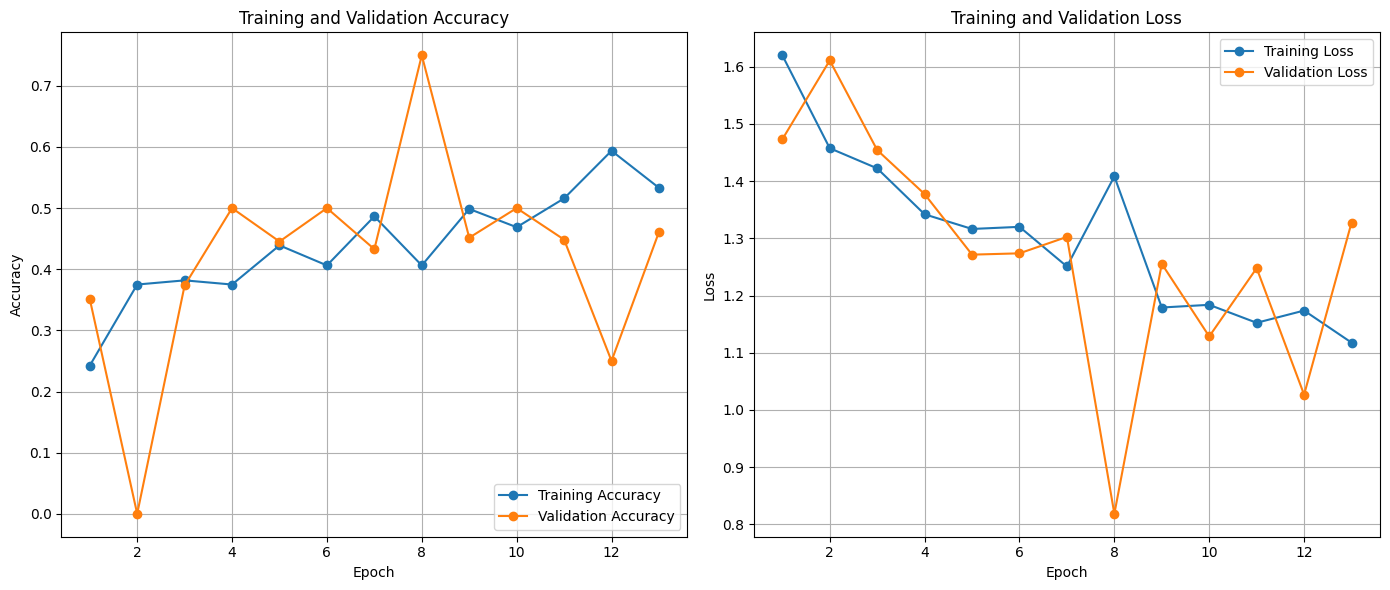

In [9]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Save the final trained model
model.save('graphology_model_final.h5')
print("Model saved as 'graphology_model_final.h5'")


Model saved as 'graphology_model_final.h5'


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/kaggle/working/graphology_model_final.h5')  # or 'graphology_model_final.h5'

# Verify the model
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,383 (49.37 MB)

 Trainable params: 12,941,381 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess and predict a single image
def predict_personality(image_path, model, target_size=(128, 128)):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map class indices to labels
    class_labels = {v: k for k, v in train_generator_augmented.class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

# Example usage
sample_image_path = '/kaggle/input/devanagari-word-dataset-for-personality-prediction/Dataset/Introvert/IN_100.jpg'
personality = predict_personality(sample_image_path, model)
print(f"The predicted personality trait is: {personality}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
The predicted personality trait is: Introvert


In [14]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator_augmented, steps=validation_steps)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.3826 - loss: 1.3814
Validation Loss: 1.3054451942443848
Validation Accuracy: 0.42656248807907104


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 284ms/step


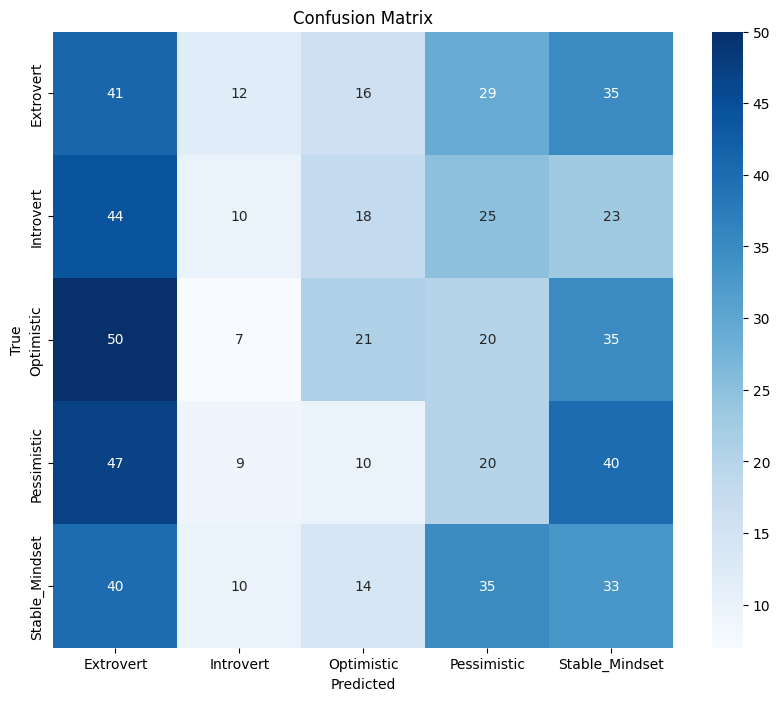

Classification Report
                precision    recall  f1-score   support

     Extrovert       0.18      0.31      0.23       133
     Introvert       0.21      0.08      0.12       120
    Optimistic       0.27      0.16      0.20       133
   Pessimistic       0.16      0.16      0.16       126
Stable_Mindset       0.20      0.25      0.22       132

      accuracy                           0.19       644
     macro avg       0.20      0.19      0.19       644
  weighted avg       0.20      0.19      0.19       644



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
Y_pred = model.predict(validation_generator_augmented, validation_steps)
y_pred = np.argmax(Y_pred, axis=1)

# Get the ground truth labels
y_true = validation_generator_augmented.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=categories))


In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

# Create the final model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with transfer learning
history_transfer = model_transfer.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=fine_tune_epochs,
    validation_data=validation_generator_augmented,
    validation_steps=validation_steps,
    callbacks=callbacks
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.3424 - loss: 2.0183
Epoch 1: val_accuracy did not improve from 0.75000
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.3433 - loss: 2.0125 - val_accuracy: 0.4609 - val_loss: 1.2401
Epoch 2/10
 1/80 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4688 - loss: 1.4049
Epoch 2: val_accuracy did not improve from 0.75000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4688 - loss: 1.4049 - val_accuracy: 0.7500 - val_loss: 0.8420
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5256 - loss: 1.1912
Epoch 3: val_accuracy did not improve from 0.75000
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.5256 - loss: 1.1911 - val_accuracy: 0.4406 - val_loss: 1.2834
Epoch 4/10
 1/80 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.3750 - loss: 1.2696
Epoch 4: val_accuracy improved from 0.75000 to 1.00000, saving model to best_graphology_model.keras
80

In [19]:
# Save the final trained model
model_transfer.save('graphology_model_final_transfer.h5')
print("Model saved as 'graphology_model_final_transfer.h5'")


Model saved as 'graphology_model_final_transfer.h5'


In [22]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/kaggle/working/graphology_model_final_transfer.h5')  # or 'graphology_model_final.h5'

# Verify the model
loaded_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,912,071 (72.14 MB)

 Trainable params: 4,197,381 (16.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess and predict a single image
def predict_personality(image_path, model_transfer, target_size=(128, 128)):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model_transfer.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map class indices to labels
    class_labels = {v: k for k, v in train_generator_augmented.class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

# Example usage
sample_image_path = '/kaggle/input/devanagari-word-dataset-for-personality-prediction/Dataset/Introvert/IN_100.jpg'
personality = predict_personality(sample_image_path, model_transfer)
print(f"The predicted personality trait is: {personality}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted personality trait is: Introvert


In [24]:
# Evaluate the model on the validation set
loss, accuracy = model_transfer.evaluate(validation_generator_augmented, steps=validation_steps)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.4806 - loss: 1.2320
Validation Loss: 1.246242880821228
Validation Accuracy: 0.4765625


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step


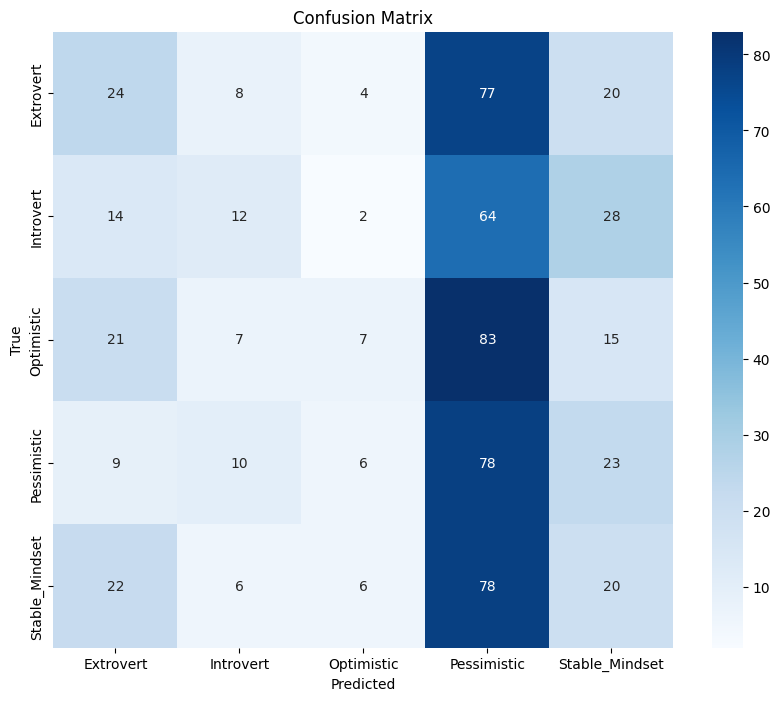

Classification Report
                precision    recall  f1-score   support

     Extrovert       0.27      0.18      0.22       133
     Introvert       0.28      0.10      0.15       120
    Optimistic       0.28      0.05      0.09       133
   Pessimistic       0.21      0.62      0.31       126
Stable_Mindset       0.19      0.15      0.17       132

      accuracy                           0.22       644
     macro avg       0.24      0.22      0.19       644
  weighted avg       0.24      0.22      0.18       644



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
Y_pred = model_transfer.predict(validation_generator_augmented, validation_steps)
y_pred = np.argmax(Y_pred, axis=1)

# Get the ground truth labels
y_true = validation_generator_augmented.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=categories))
